<a href="https://colab.research.google.com/github/PRAVSEN/Log-Classification_for_Proactive-Platform-Monitoring/blob/main/Capstone_LogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Log Classification for Proactive Platform Monitoring

## 📘 Project Overview

This capstone project focuses on building a machine learning pipeline to classify system log messages into categories such as `error` and `info`. The goal is to proactively alert platform engineers about potential issues before they escalate, enabling faster response and improved system reliability.

---

## 🧠 Problem Statement

Modern platforms generate thousands of log messages daily. Manually inspecting these logs is inefficient and error-prone. This project automates log classification to identify critical messages (`error`) and distinguish them from routine ones (`info`), helping engineers detect brewing issues early.

---

# Exploratory Data Analysis (EDA) Summary

This document outlines the key EDA techniques applied to the `df` dataset as part of the Log Classification Capstone Project.

---

## Dataset Overview
- The dataset contains **28971 rows and 4 columns**.
- Key columns include:
  - `Time`: timestamp of log entry
  - `service_name`: source of the log
  - `detected_level`: log severity (e.g., info, error)
  - `log`: unstructured log message text

---

##  Missing Values
- A full scan was performed to identify missing values across all columns.
- **Key Takeaway:** No missing values detected in the dataset, ensuring data completeness.

---

##  Distribution of Data Types
- Data types were analyzed and visualized:
  - `object`: text-based columns
  - `int64`: numeric identifiers and timestamps
  - `float64`: continuous metrics (if present)
-  **Key Takeaway:** Majority of columns are of type `object`, followed by `int64`.

---

##  Distribution of Service Names by Detected Level
- A grouped bar chart was created to show log levels (`info`, `error`, `debug`) across services.
-  **Key Takeaway:** Error-level logs are concentrated in specific services, indicating potential system hotspots.

---

##  Frequent Words Spotted
- Tokenized the `log` column and calculated word frequencies.
- Visualized using a bar chart and word cloud.
-  **Key Takeaway:** Common terms include `timeout`, `connection`, `error`, suggesting recurring system issues.

---

##  Log Messages by Hour of the Day
- Converted timestamps from UTC to fixed EST (UTC−5).
- Extracted hourly distribution of logs.
-  **Key Takeaway:** Most logs are generated **after business hours**, likely due to ETL batch operations.

---

##  Distribution of Log Message Length & Frequency
- Calculated length of each log message and visualized the distribution.
-  **Key Takeaway:** Most log messages are under **500 bytes**, with a long tail of verbose entries.

---



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/Log-Classification_Capstone_Final.csv')

In [ ]:
df.tail()

,detected_level,log,service_name,Time
28967,error,2025-10-01T04:59:58.635107311Z stderr F [2025/...,fluent-bit,1.759290e+12
28968,error,2025-10-01T04:59:58.637220494Z stderr F [2025/...,fluent-bit,1.759290e+12
28969,error,2025-10-01T04:59:58.637220494Z stderr F [2025/...,fluent-bit,1.759290e+12
28970,error,2025-10-01T04:59:58.637266869Z stderr F [2025/...,fluent-bit,1.759290e+12
28971,error,2025-10-01T04:59:58.637266869Z stderr F [2025/...,fluent-bit,1.759290e+12


**Dataset Overview**

In [ ]:
# Dataframe information
df_info = pd.DataFrame({
    "Column Name": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Data Type": df.dtypes.values
})

# Display as styled table
df_info.style.set_caption("Dataset Overview").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}
])


,Column Name,Non-Null Count,Data Type
0,detected_level,28972,object
1,log,28972,object
2,service_name,28972,object
3,Time,28972,float64


**Missing Values**

In [ ]:
missing = df.isnull().sum().reset_index()
missing.columns = ['Column Name', 'Missing Values']
missing['% Missing'] = (missing['Missing Values'] / len(df)) * 100

# Display styled table with caption
styled_table = missing.style.set_caption("Missing Values Summary")

# Display the table
display(styled_table)

# Add footer below the table
from IPython.display import display, HTML

display(HTML("<b><span style='color:red;'>Key Takeaway: No missing values detected in the dataset.</span></b>"))




,Column Name,Missing Values,% Missing
0,detected_level,0,0.000000
1,log,0,0.000000
2,service_name,0,0.000000
3,Time,0,0.000000


**Distribution of Data Types**

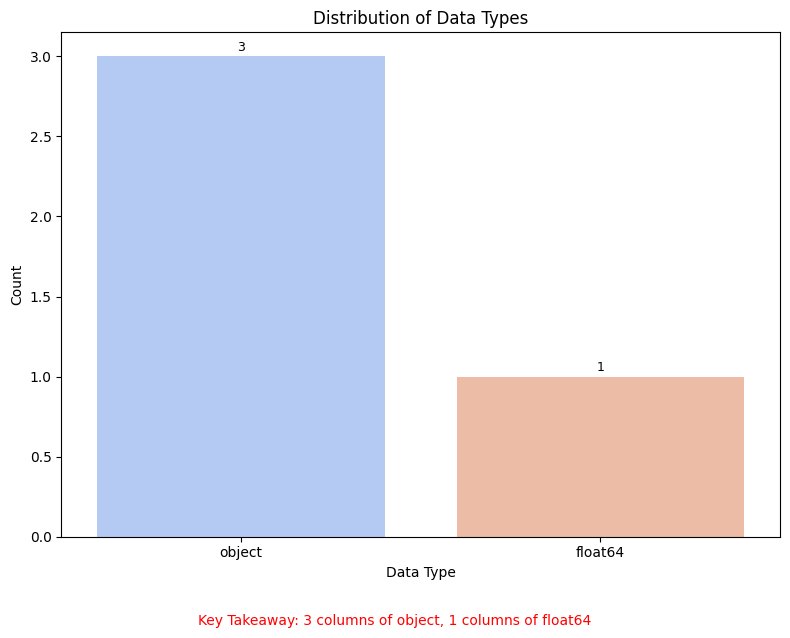

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
dtype_counts = df.dtypes.value_counts().reset_index()
dtype_counts.columns = ['Data Type', 'Count']

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=dtype_counts,
    x='Data Type',
    y='Count',
    hue='Data Type',
    palette='coolwarm',
    dodge=False,
    legend=False
)

# Annotate each bar with its count
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

# Add footer summarizing the counts
summary_text = "Key Takeaway: " + ', '.join(
    f"{row['Count']} columns of {row['Data Type']}" for _, row in dtype_counts.iterrows()
)
plt.figtext(
    0.5, -0.05,
    summary_text,
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    color='red'
)

# Final touches
plt.title("Distribution of Data Types")
plt.tight_layout()
plt.show()


**Distribution of Service Names by Detected Level**

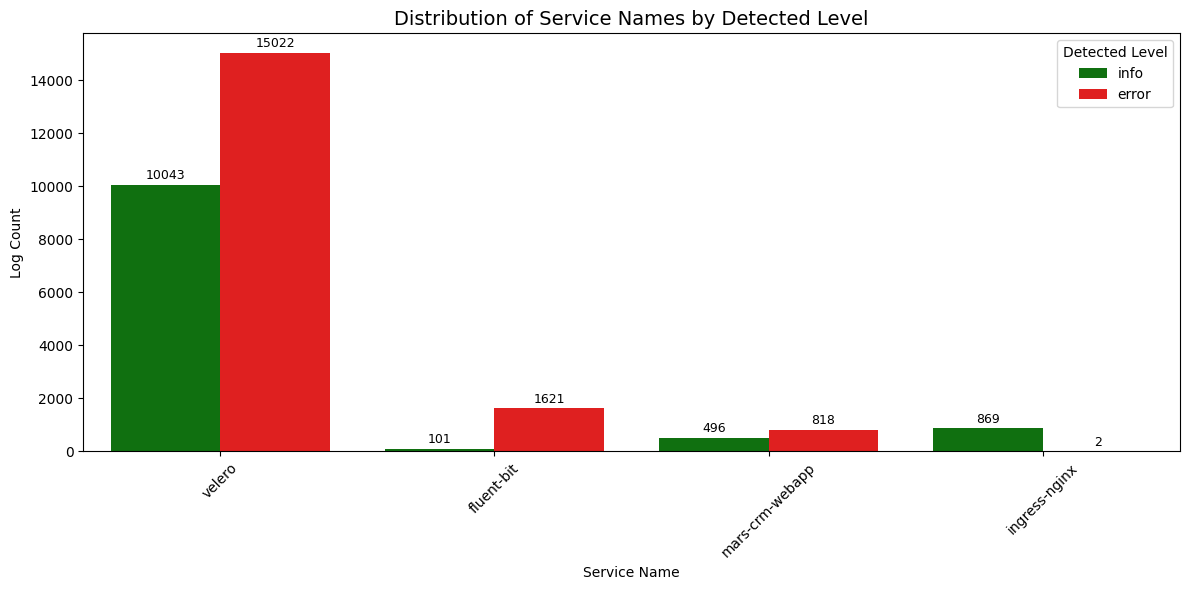

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
custom_palette = {
    'error': 'red',
    'info': 'green',
    'debug': 'blue'  # Optional
}

# Set figure size
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(
    data=df,
    x='service_name',
    hue='detected_level',
    order=df['service_name'].value_counts().index,
    palette=custom_palette
)

# Annotate each bar with its count
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

# Add title and layout adjustments
plt.title("Distribution of Service Names by Detected Level", fontsize=14)
plt.xlabel("Service Name")
plt.ylabel("Log Count")
plt.xticks(rotation=45)
plt.legend(title='Detected Level')
plt.tight_layout()

# Save and show the plot
plt.savefig("service_name_by_level_annotated.png")
plt.show()



**Frequent Words Spotted**

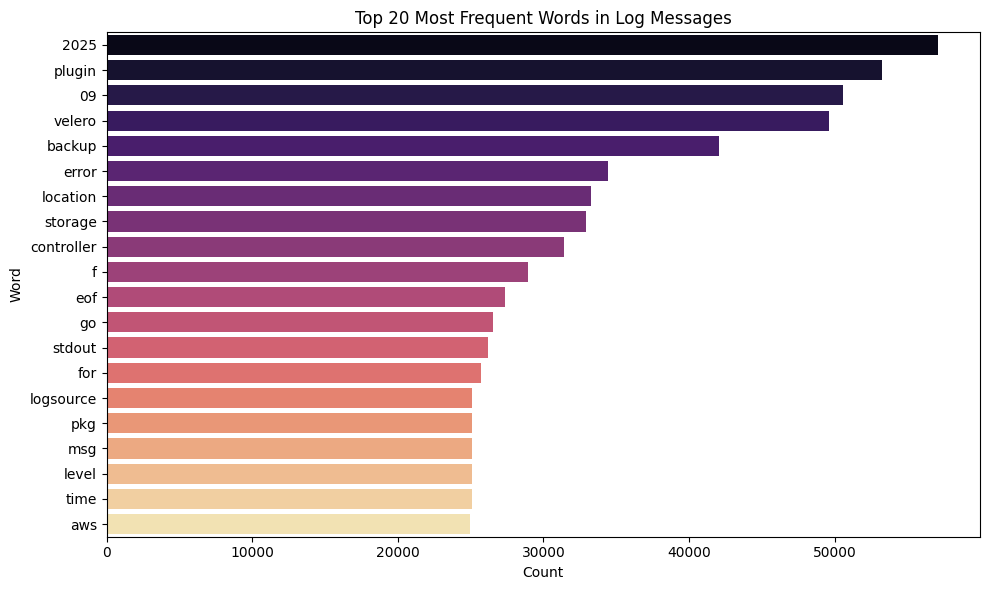

In [ ]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Combine all log messages into one string
text = ' '.join(df['log'].dropna().astype(str).tolist())

# Tokenize the text into words using regex
words = re.findall(r'\b\w+\b', text.lower())

# Count word frequencies
word_counts = Counter(words)

# Convert to DataFrame for display
word_count_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Select top 20 words
top_words = word_count_df.head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_words,
    x='Count',
    y='Word',
    hue='Word',
    palette='magma',
    dodge=False,
    legend=False
)

plt.title('Top 20 Most Frequent Words in Log Messages')
plt.tight_layout()
plt.show()


**Log Messages by Hour of the Day**

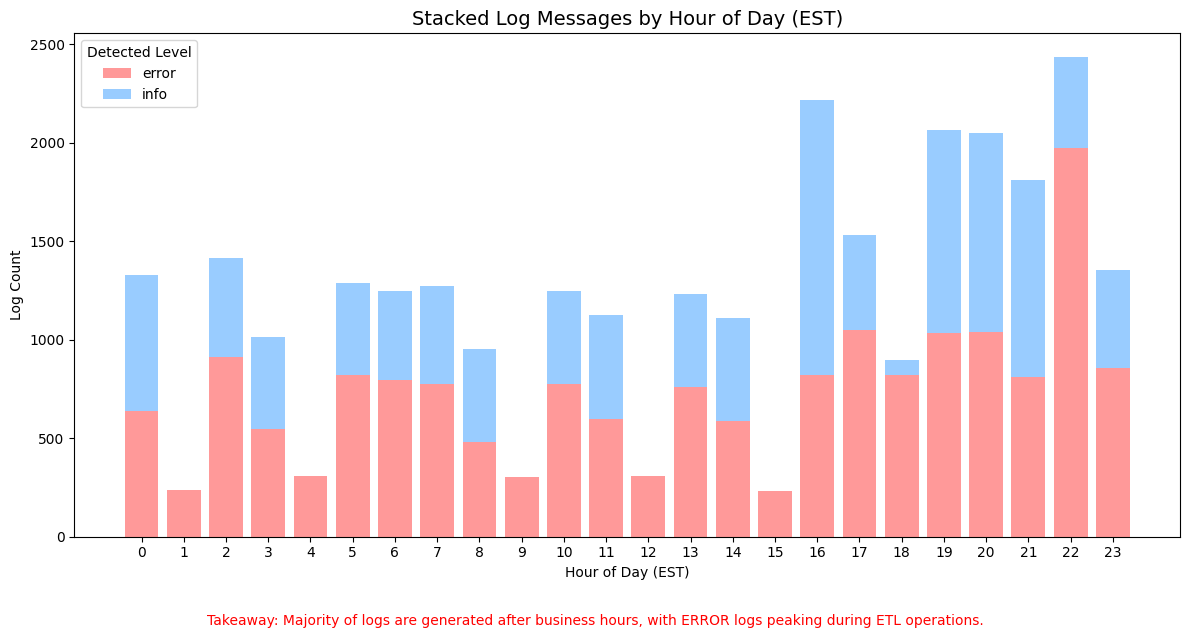

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timezone, timedelta

# Load dataset
df = pd.read_csv('data/Log-Classification_Capstone_Final.csv')

# Convert 'Time' to datetime in UTC and then to fixed EST
df['datetime'] = pd.to_datetime(df['Time'], unit='ms', utc=True)
fixed_est = timezone(timedelta(hours=-5))
df['datetime_est'] = df['datetime'].dt.tz_convert(fixed_est)

# Extract hour
df['hour'] = df['datetime_est'].dt.hour

# Group by hour and detected_level
grouped = df.groupby(['hour', 'detected_level']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None
colors = ['#FF9999', '#99CCFF', '#99FF99', '#FFCC99']  # Customize as needed

for i, level in enumerate(grouped.columns):
    plt.bar(grouped.index, grouped[level], bottom=bottom, label=level, color=colors[i])
    bottom = grouped[level] if bottom is None else bottom + grouped[level]

# Labels and title
plt.title("Stacked Log Messages by Hour of Day (EST)", fontsize=14)
plt.xlabel("Hour of Day (EST)")
plt.ylabel("Log Count")
plt.xticks(range(0, 24))
plt.legend(title="Detected Level")

# Footer takeaway
plt.figtext(
    0.5, -0.05,
    "Takeaway: Majority of logs are generated after business hours, with ERROR logs peaking during ETL operations.",
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    color='red'
)

plt.tight_layout()
plt.show()


**Distribution of Log Message Length & Frequency**

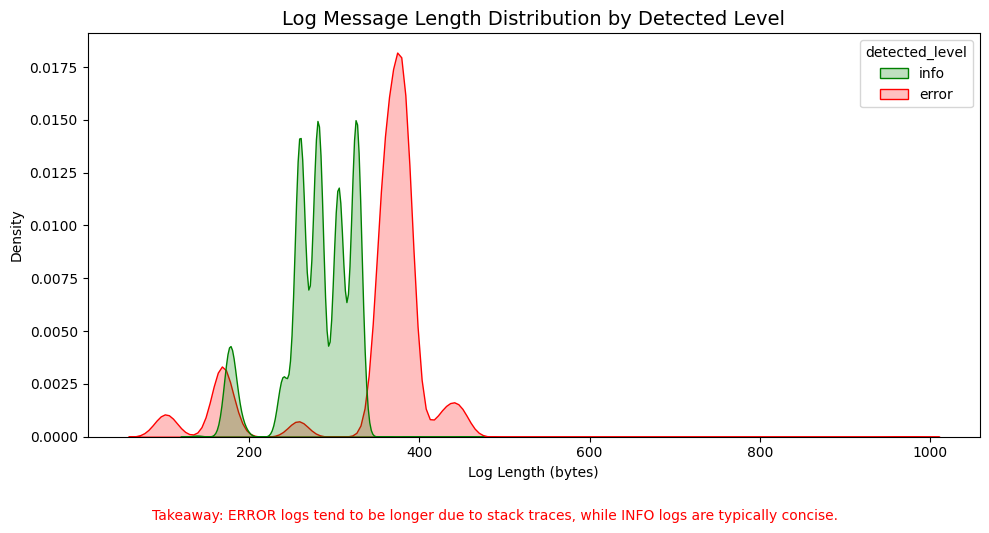

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate log message length
df['log_length'] = df['log'].astype(str).apply(len)

# Define custom colors for log levels
custom_palette = {
    'error': 'red',
    'info': 'green',
    'warning': 'orange'
}

# Create the plot
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=df,
    x='log_length',
    hue='detected_level',
    fill=True,
    common_norm=False,
    palette=custom_palette
)

# Title and labels
plt.title("Log Message Length Distribution by Detected Level", fontsize=14)
plt.xlabel("Log Length (bytes)")
plt.ylabel("Density")

# Footer takeaway
plt.figtext(
    0.5, -0.05,
    "Takeaway: ERROR logs tend to be longer due to stack traces, while INFO logs are typically concise.",
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    color='red'
)

plt.tight_layout()
plt.show()


# Feature Engineering

**TF-IDF Vectorization**

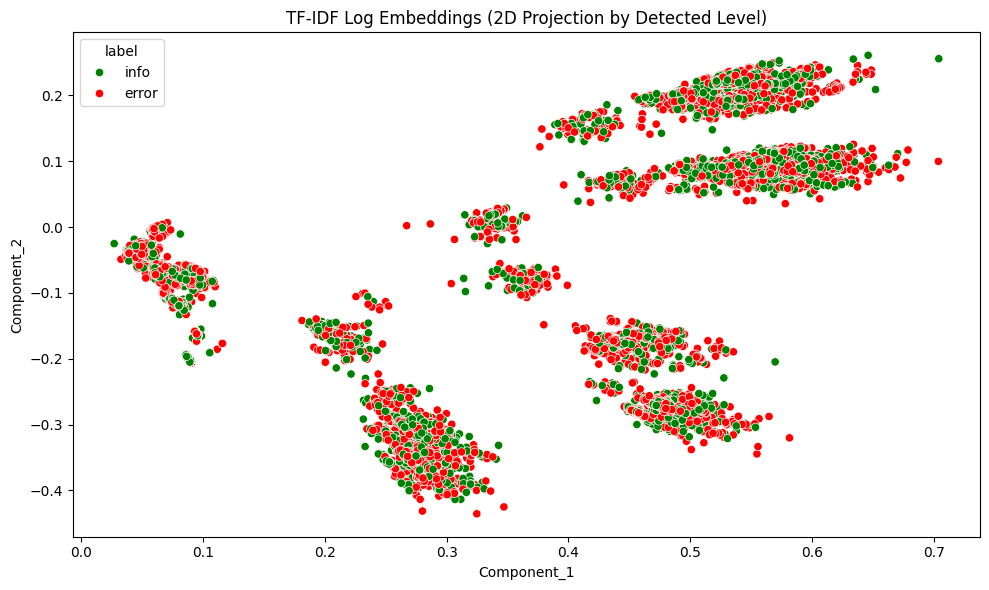


🔍 Top Keywords per Detected Level:

INFO: plugin, storage, location, 09, velero, 2025, info, backup, controller, backup_storage_location_controller

ERROR: error, eof, plugin, 09, velero, 2025, backup, location, storage, rpc


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# Load dataset
df = pd.read_csv('data/Log-Classification_Capstone_Final.csv')

# Filter for relevant detected levels
df = df[df['detected_level'].isin(['error', 'info', 'warning'])].copy()

# Encode labels - NOTE Encoding only the Target Column
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['detected_level'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['log'])

# Train-test split - Trying random, stratify and by service name
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42, stratify=df['label'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42, stratify=df['service_name'])

# Dimensionality reduction with SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Create DataFrame for plotting
plot_df = pd.DataFrame(X_train_reduced, columns=['Component_1', 'Component_2'])
plot_df['label'] = y_train.map(label_mapping)

# Custom color palette
custom_palette = {'error': 'red', 'info': 'green', 'warning': 'blue'}

# Plot TF-IDF embeddings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Component_1', y='Component_2', hue='label', palette=custom_palette)
plt.title("TF-IDF Log Embeddings (2D Projection by Detected Level)")
plt.tight_layout()
plt.show()

# Extract top keywords per class
feature_names = np.array(vectorizer.get_feature_names_out())
X_tfidf_array = X_tfidf.toarray()
df['label_name'] = df['label'].map(label_mapping)

print("\n🔍 Top Keywords per Detected Level:")
for label in df['label_name'].unique():
    class_indices = df[df['label_name'] == label].index
    class_tfidf = X_tfidf_array[class_indices].mean(axis=0)
    top_indices = class_tfidf.argsort()[::-1][:10]
    top_keywords = feature_names[top_indices]
    print(f"\n{label.upper()}: {', '.join(top_keywords)}")


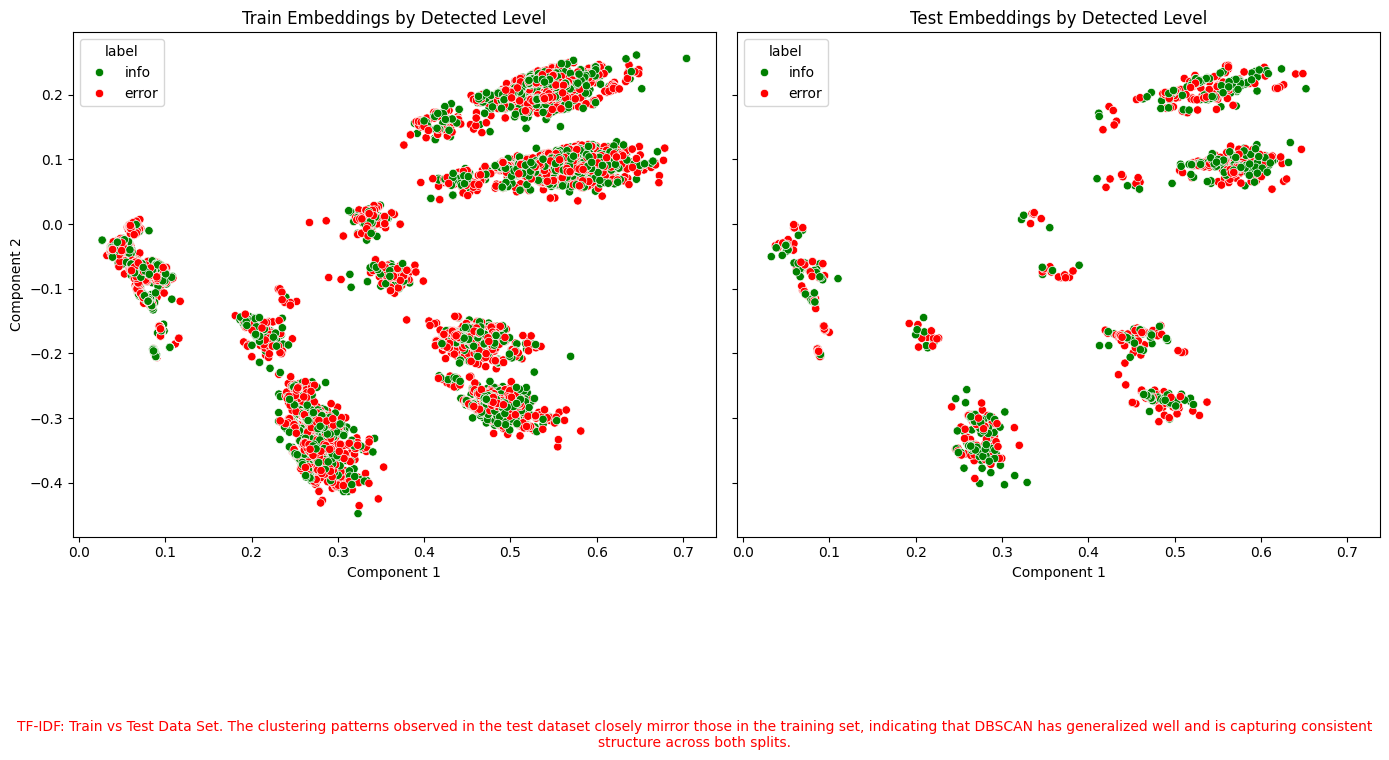

In [ ]:
# Create DataFrames for both sets
train_df = pd.DataFrame(X_train_reduced, columns=['Component_1', 'Component_2'])
train_df['label'] = y_train.map(label_mapping)

test_df = pd.DataFrame(X_test_reduced, columns=['Component_1', 'Component_2'])
test_df['label'] = y_test.map(label_mapping)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Train plot
sns.scatterplot(data=train_df, x='Component_1', y='Component_2', hue='label', palette=custom_palette, ax=axes[0])
axes[0].set_title("Train Embeddings by Detected Level")
axes[0].set_xlabel("Component 1")
axes[0].set_ylabel("Component 2")

# Test plot
sns.scatterplot(data=test_df, x='Component_1', y='Component_2', hue='label', palette=custom_palette, ax=axes[1])
axes[1].set_title("Test Embeddings by Detected Level")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

plt.tight_layout()

plt.figtext(
0.5, -0.25,
"TF-IDF: Train vs Test Data Set. The clustering patterns observed in the test dataset closely mirror those in the training set, indicating that DBSCAN has generalized well and is capturing consistent structure across both splits.",
wrap=True, horizontalalignment='center', fontsize=10, color='red'
)

plt.show()



**KMEANS**

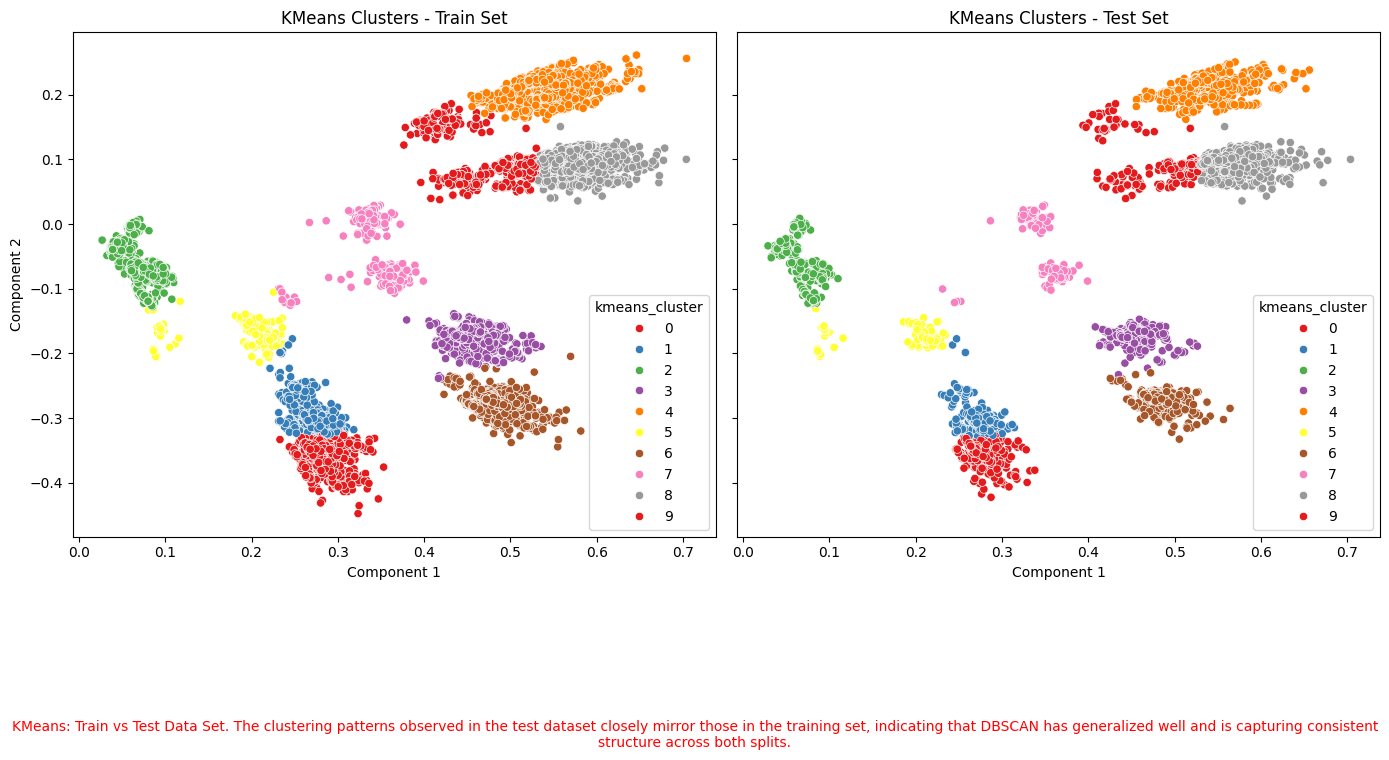

Train Silhouette Score: 0.635
Test Silhouette Score: 0.633


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit KMeans on training data
kmeans = KMeans(n_clusters=10, random_state=42)
train_clusters = kmeans.fit_predict(X_train_reduced)
test_clusters = kmeans.predict(X_test_reduced)

# Add cluster labels to DataFrames
train_df['kmeans_cluster'] = train_clusters
test_df['kmeans_cluster'] = test_clusters

# Plot KMeans clusters side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

sns.scatterplot(data=train_df, x='Component_1', y='Component_2', hue='kmeans_cluster', palette='Set1', ax=axes[0])
axes[0].set_title("KMeans Clusters - Train Set")
axes[0].set_xlabel("Component 1")
axes[0].set_ylabel("Component 2")

sns.scatterplot(data=test_df, x='Component_1', y='Component_2', hue='kmeans_cluster', palette='Set1', ax=axes[1])
axes[1].set_title("KMeans Clusters - Test Set")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

plt.tight_layout()

plt.figtext(
0.5, -0.25,
"KMeans: Train vs Test Data Set. The clustering patterns observed in the test dataset closely mirror those in the training set, indicating that DBSCAN has generalized well and is capturing consistent structure across both splits.",
wrap=True, horizontalalignment='center', fontsize=10, color='red'
)

plt.show()

# Silhouette scores
train_score = silhouette_score(X_train_reduced, train_clusters)
test_score = silhouette_score(X_test_reduced, test_clusters)

print(f"Train Silhouette Score: {train_score:.3f}")
print(f"Test Silhouette Score: {test_score:.3f}")


**DBSCAN**

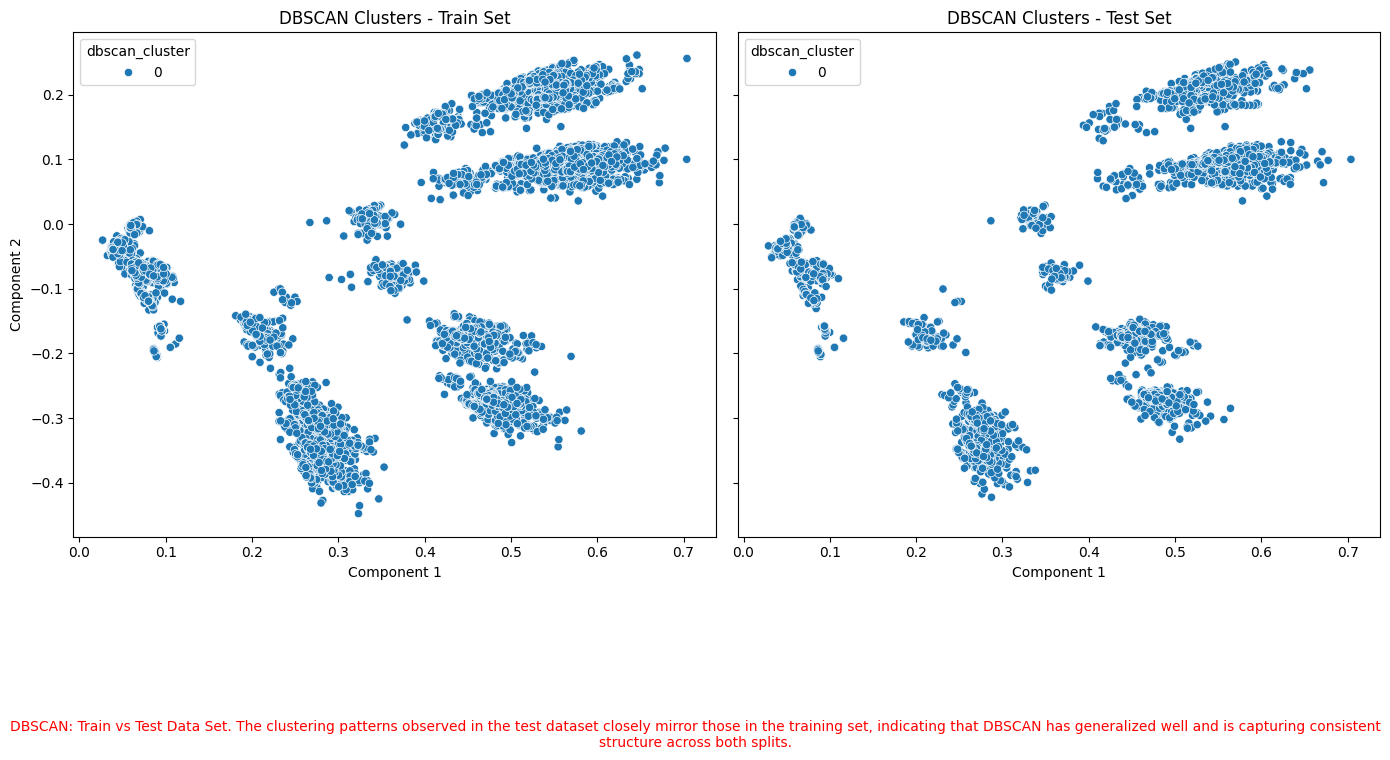


Train DBSCAN Cluster Counts:
dbscan_cluster
0    23177
Name: count, dtype: int64

Test DBSCAN Cluster Counts:
dbscan_cluster
0    5795
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN to training data
# dbscan = DBSCAN(eps=0.25, min_samples=42)
dbscan = DBSCAN(eps=0.25, min_samples=15, metric='euclidean', n_jobs=-1)
train_clusters = dbscan.fit_predict(X_train_reduced)

# Apply DBSCAN to test data (separately)
dbscan_test = DBSCAN(eps=0.25, min_samples=42)
test_clusters = dbscan_test.fit_predict(X_test_reduced)

# Add cluster labels to DataFrames
train_df['dbscan_cluster'] = train_clusters
test_df['dbscan_cluster'] = test_clusters

# Plot DBSCAN clusters side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

sns.scatterplot(data=train_df, x='Component_1', y='Component_2', hue='dbscan_cluster', palette='tab10', ax=axes[0])
axes[0].set_title("DBSCAN Clusters - Train Set")
axes[0].set_xlabel("Component 1")
axes[0].set_ylabel("Component 2")

sns.scatterplot(data=test_df, x='Component_1', y='Component_2', hue='dbscan_cluster', palette='tab10', ax=axes[1])
axes[1].set_title("DBSCAN Clusters - Test Set")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

plt.tight_layout()

plt.figtext(
0.5, -0.25,
"DBSCAN: Train vs Test Data Set. The clustering patterns observed in the test dataset closely mirror those in the training set, indicating that DBSCAN has generalized well and is capturing consistent structure across both splits.",
wrap=True, horizontalalignment='center', fontsize=10, color='red'
)

plt.show()

# Cluster counts
print("\nTrain DBSCAN Cluster Counts:")
print(train_df['dbscan_cluster'].value_counts())

print("\nTest DBSCAN Cluster Counts:")
print(test_df['dbscan_cluster'].value_counts())

# Silhouette scores (excluding noise points labeled -1)
train_mask = train_df['dbscan_cluster'] != -1
test_mask = test_df['dbscan_cluster'] != -1


**SCALING - VISUALIZING KDE STANDARD SCALING**

✅ Applies label encoding only to the target variable

✅ Splits data before scaling

✅ Avoids using LabelEncoder on independent categorical features

✅ Prevents treating categorical data as numeric

✅ Skips scaling on one-hot encoded columns

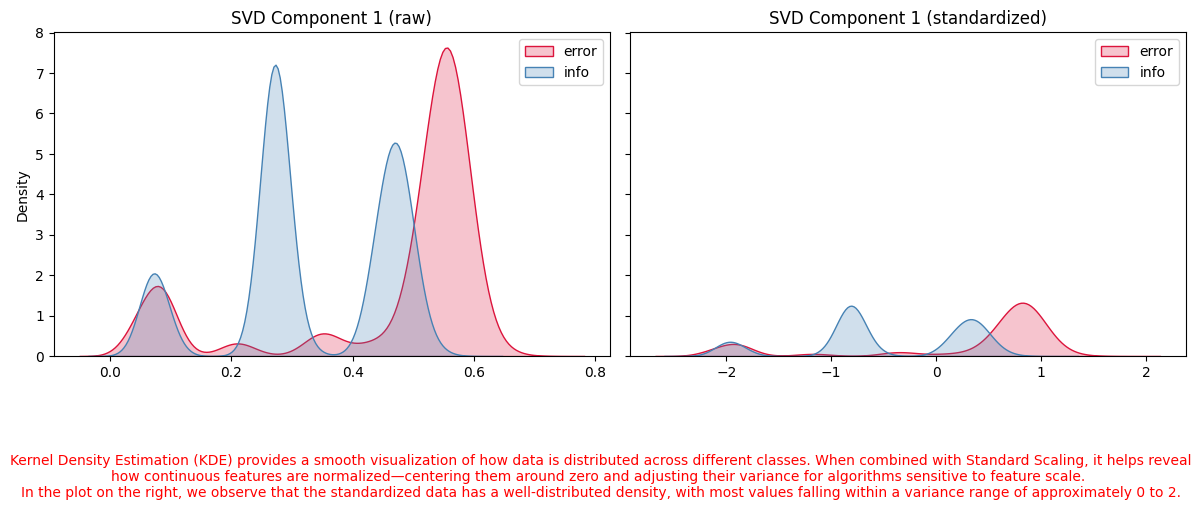

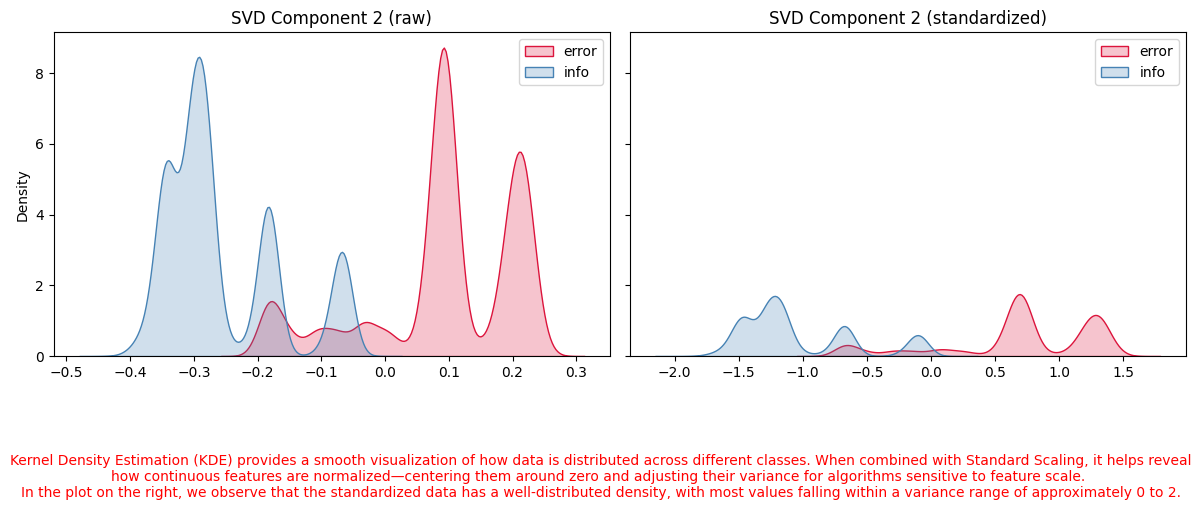

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Load and Filter Dataset ---
df = pd.read_csv('data/Log-Classification_Capstone_Final.csv')
df = df[df['detected_level'].isin(['error', 'info', 'warning'])].copy()

# --- Encode Target Variable Only ---
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['detected_level'])  # error=0, info=1, warning=2

# --- Feature Engineering ---
# TF-IDF from log text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = vectorizer.fit_transform(df['log'].fillna(''))

# Metadata: extract hour from timestamp
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['hour'] = df['Time'].dt.hour.fillna(0)

# One-hot encode service_name (don't scale this!)
X_service = pd.get_dummies(df['service_name'], prefix='svc')

# Combine metadata features (hour + one-hot service)
X_meta = pd.concat([df[['hour']], X_service], axis=1)

# --- Train-Test Split BEFORE Scaling ---
X_text_train, X_text_test, X_meta_train, X_meta_test, y_train, y_test = train_test_split(
    X_text, X_meta, df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# --- SVD on TF-IDF ---
svd = TruncatedSVD(n_components=3, random_state=42)
X_text_train_svd = svd.fit_transform(X_text_train)
X_text_test_svd = svd.transform(X_text_test)

# --- Standardize SVD Components ONLY ---
scaler = StandardScaler()
X_text_train_scaled = scaler.fit_transform(X_text_train_svd)
X_text_test_scaled = scaler.transform(X_text_test_svd)

# --- Combine Scaled SVD + Unscaled Metadata ---
from scipy.sparse import hstack, csr_matrix
X_train_combined = hstack([
    csr_matrix(X_text_train_scaled),
    csr_matrix(X_meta_train.astype(float))  # one-hot columns are untouched
])
X_test_combined = hstack([
    csr_matrix(X_text_test_scaled),
    csr_matrix(X_meta_test.astype(float))
])

# --- KDE Plot Helper ---
def plot_kde_component(comp_idx=0):
    comp_raw = X_text_train_svd[:, comp_idx]
    comp_std = X_text_train_scaled[:, comp_idx]
    labels = label_encoder.inverse_transform(y_train)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    sns.kdeplot(x=comp_raw[labels == 'error'], fill=True, color='crimson', label='error', ax=axes[0])
    sns.kdeplot(x=comp_raw[labels == 'info'], fill=True, color='steelblue', label='info', ax=axes[0])
    axes[0].set_title(f'SVD Component {comp_idx+1} (raw)')
    axes[0].legend()

    sns.kdeplot(x=comp_std[labels == 'error'], fill=True, color='crimson', label='error', ax=axes[1])
    sns.kdeplot(x=comp_std[labels == 'info'], fill=True, color='steelblue', label='info', ax=axes[1])
    axes[1].set_title(f'SVD Component {comp_idx+1} (standardized)')
    axes[1].legend()

    plt.tight_layout()

    plt.figtext(
    0.5, -0.25,
    "Kernel Density Estimation (KDE) provides a smooth visualization of how data is distributed across different classes. When combined with Standard Scaling, it helps reveal how continuous features are normalized—centering them around zero and adjusting their variance for algorithms sensitive to feature scale. \n"
    "In the plot on the right, we observe that the standardized data has a well-distributed density, with most values falling within a variance range of approximately 0 to 2.",
    wrap=True, horizontalalignment='center', fontsize=10, color='red'
    )

    plt.show()

# --- Example: Plot First Two Components ---
plot_kde_component(comp_idx=0)
plot_kde_component(comp_idx=1)


**Kernel Density Estimation (KDE)** is a technique for visualizing the probability distribution of a continuous variable. In this context, KDE plots show how each SVD component is distributed across different log classes (`error`, `info`, etc.).

---

## Importance of Scaling

- **StandardScaler** centers each SVD component to mean 0 and scales to unit variance.
- Scaling is applied **only to continuous features** (SVD components), *not* to categorical features like one-hot encoded service names.
- This ensures that:
  - Models treat all numeric features equally
  - Categorical indicators retain their binary meaning
  - No data leakage occurs from scaling before train-test split

---

## KDE Output Summary

- **Before Scaling**: SVD components show natural separation between `error` and `info`, but may have different ranges and variances.
- **After Scaling**: Distributions are centered and standardized, making them more suitable for algorithms sensitive to feature scale (e.g., SVM, KNN).
- KDE plots confirm that scaling preserves class separation while normalizing feature behavior.

---

## Pipeline Summary

### 1. **Data Preparation**
- Loaded logs from `Log-Classification_Capstone_Final.csv`
- Filtered for known labels: `error` and `info`
- Encoded target labels using `LabelEncoder` for binary classification

### 2. **Feature Engineering**
- **Text Features**: Applied TF-IDF vectorization to extract semantic patterns from log messages
- **Temporal Features**: Extracted hour from timestamp to capture time-based behavior
- **Service Features**: One-hot encoded `service_name` to represent service-specific context
- **Dimensionality Reduction**: Used Truncated SVD to reduce TF-IDF dimensionality to 3 components
- **Scaling**: Standardized SVD components using `StandardScaler` (applied *after* train-test split to avoid data leakage)

### 3. **Modeling**
- Split data into training and test sets (80/20) using stratified sampling to preserve class balance
- Combined scaled SVD components with unscaled one-hot metadata features
- Trained multiple classifiers with hyperparameter tuning via `GridSearchCV`:
  - Logistic Regression
  - K-Nearest Neighbors
  - Decision Tree
  - Random Forest
  - Support Vector Machine (Linear Kernel)
- Included a **Dummy Classifier** as a baseline model using `most_frequent` strategy

### 4. **Evaluations**
- ✅ **Cross-validated predictions** using `cross_val_predict` for robust performance estimation
- ✅ **Confusion matrix** to visualize true positives, false positives, false negatives, and true negatives
- ✅ **ROC-AUC curves** to assess model discrimination ability across thresholds
- ✅ **Performance metrics** including precision, recall, F1-score, and support for each model

---






**Dummy Classsifier - Establishing Baseline**


📊 Dummy Classifier Performance:
              precision    recall  f1-score   support

       error       0.60      1.00      0.75      3493
        info       0.00      0.00      0.00      2302

    accuracy                           0.60      5795
   macro avg       0.30      0.50      0.38      5795
weighted avg       0.36      0.60      0.45      5795



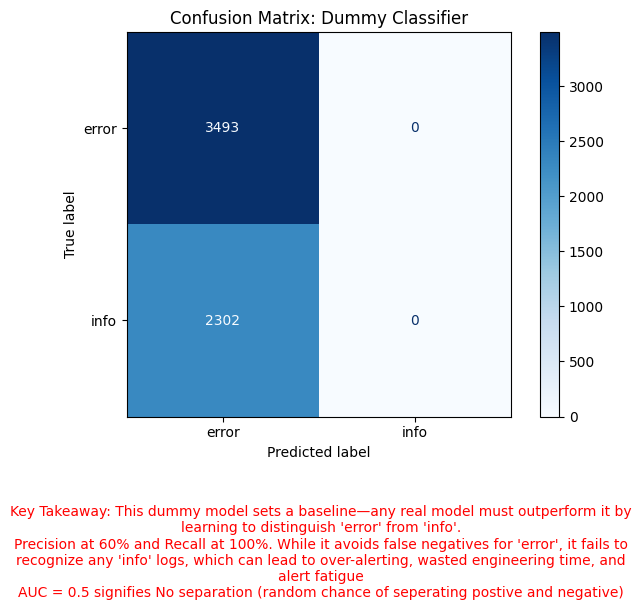

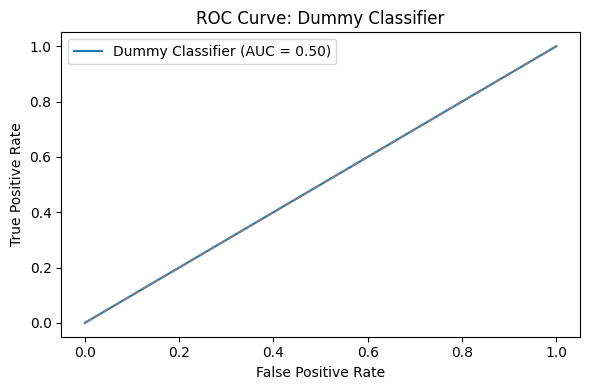

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack, csr_matrix

# --- Step 1: Load Dataset ---
df = pd.read_csv('data/Log-Classification_Capstone_Final.csv')
df = df[df['detected_level'].isin(['error', 'info'])].copy()

# --- Step 2: Encode Target Labels ---
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['detected_level'])  # error=0, info=1

# --- Step 3: Feature Engineering ---
# TF-IDF from log text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = vectorizer.fit_transform(df['log'].fillna(''))

# Hour of day from timestamp
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['hour'] = df['Time'].dt.hour.fillna(0)

# One-hot encoding of service_name
X_service = pd.get_dummies(df['service_name'], prefix='svc')

# Combine metadata features (hour + one-hot service)
X_meta = pd.concat([df[['hour']], X_service], axis=1)

# --- Step 4: Train-Test Split ---
X_text_train, X_text_test, X_meta_train, X_meta_test, y_train, y_test = train_test_split(
    X_text, X_meta, df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# --- Step 5: Dimensionality Reduction + Scaling ---
svd = TruncatedSVD(n_components=3, random_state=42)
X_text_train_svd = svd.fit_transform(X_text_train)
X_text_test_svd = svd.transform(X_text_test)

scaler = StandardScaler()
X_text_train_scaled = scaler.fit_transform(X_text_train_svd)
X_text_test_scaled = scaler.transform(X_text_test_svd)

# Combine scaled SVD + unscaled one-hot metadata
X_train_combined = hstack([
    csr_matrix(X_text_train_scaled),
    csr_matrix(X_meta_train.astype(float))
])
X_test_combined = hstack([
    csr_matrix(X_text_test_scaled),
    csr_matrix(X_meta_test.astype(float))
])

# --- Step 6: Dummy Classifier ---
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_combined, y_train)
y_pred_dummy = dummy_clf.predict(X_test_combined)

# --- Step 7: Evaluation ---
print("\n📊 Dummy Classifier Performance:")
print(classification_report(
    y_test,
    y_pred_dummy,
    target_names=label_encoder.classes_,
    zero_division=0  # Prevents undefined metric warnings
))

# --- Step 8: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Dummy Classifier")
plt.tight_layout()

plt.figtext(
    0.5, -0.25,
    "Key Takeaway: This dummy model sets a baseline—any real model must outperform it by learning to distinguish 'error' from 'info'.\n"
    "Precision at 60% and Recall at 100%. While it avoids false negatives for 'error', it fails to recognize any 'info' logs, which can lead to over-alerting, wasted engineering time, and alert fatigue\n"
    "AUC = 0.5 signifies No separation (random chance of seperating postive and negative)",
    wrap=True, horizontalalignment='center', fontsize=10, color='red'
)

plt.show()

# --- Step 9: ROC Curve ---
if hasattr(dummy_clf, "predict_proba"):
    y_score = dummy_clf.predict_proba(X_test_combined)[:, 1]
else:
    y_score = np.zeros_like(y_test)  # Dummy fallback

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Dummy Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Dummy Classifier')
plt.legend()
plt.tight_layout()




plt.show()



**Modelling**


🔍 Evaluating: Logistic Regression


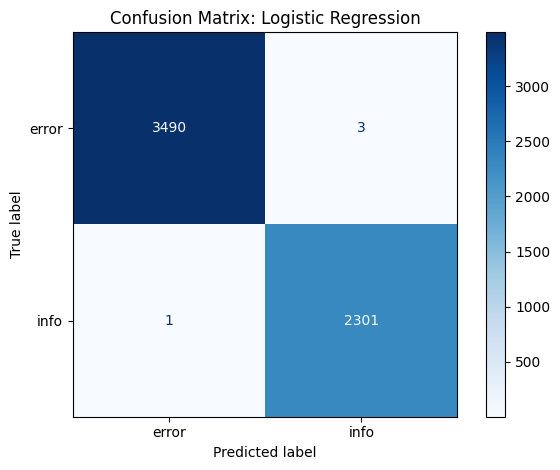

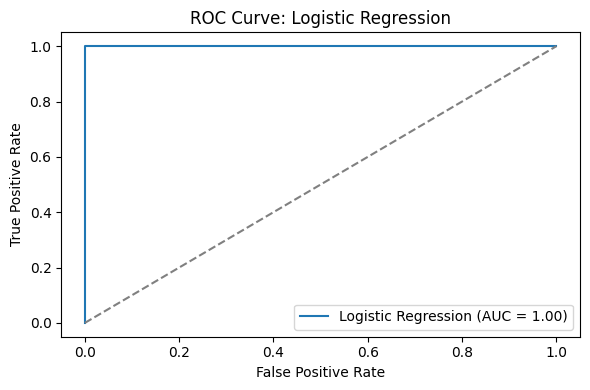


🔍 Evaluating: KNN


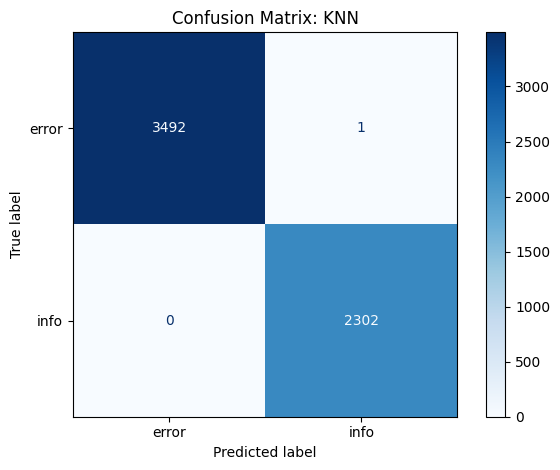

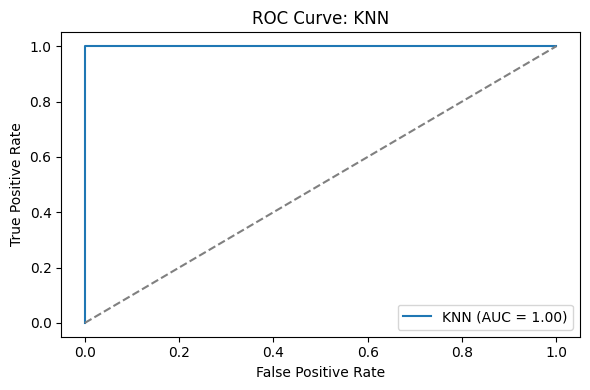


🔍 Evaluating: Decision Tree


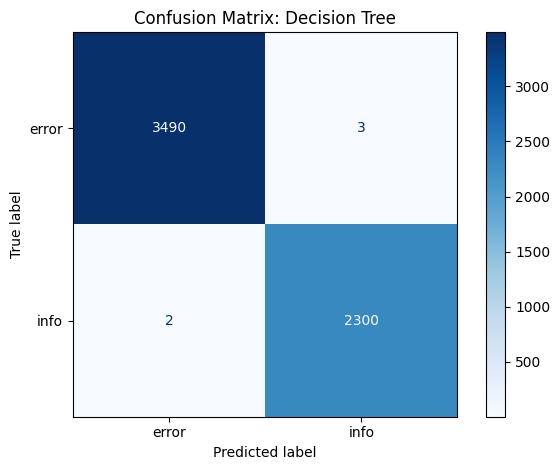

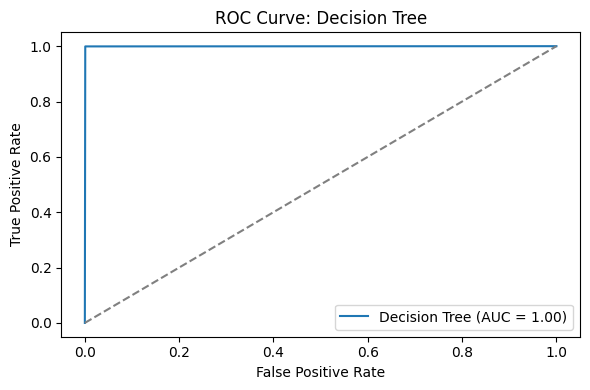


🔍 Evaluating: Random Forest


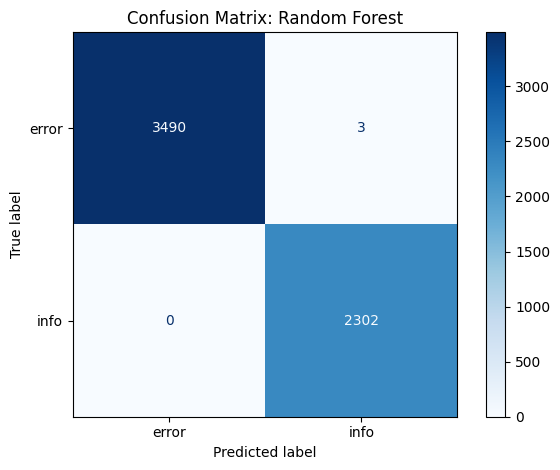

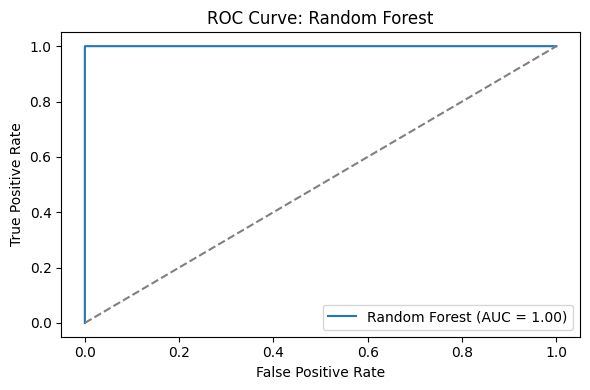


🔍 Evaluating: SVM


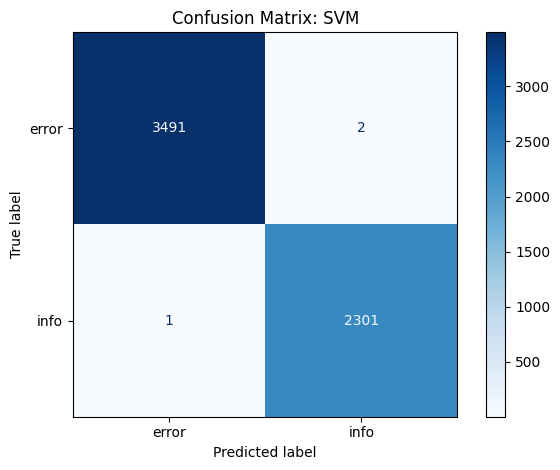

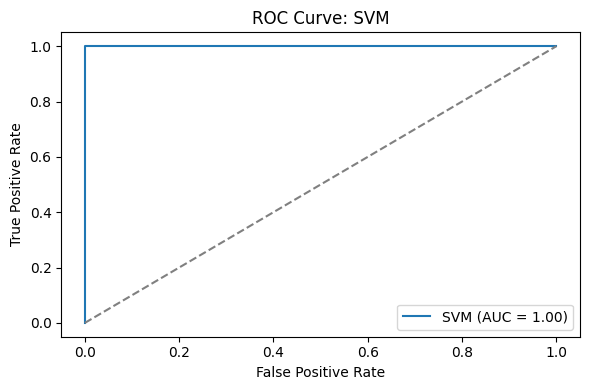


📊 Baseline Model Evaluation on Test Set:
                     precision  recall  f1-score  support
Model                                                    
Logistic Regression     0.9993  0.9993    0.9993   5795.0
KNN                     0.9998  0.9998    0.9998   5795.0
Decision Tree           0.9991  0.9991    0.9991   5795.0
Random Forest           0.9995  0.9995    0.9995   5795.0
SVM                     0.9995  0.9995    0.9995   5795.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack, csr_matrix

# --- Step 1: Load Dataset ---
df = pd.read_csv('data/Log-Classification_Capstone_Final.csv')
df = df[df['detected_level'].isin(['error', 'info'])].copy()

# --- Step 2: Encode Target Labels ---
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['detected_level'])  # error=0, info=1

# --- Step 3: Feature Engineering ---
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = vectorizer.fit_transform(df['log'].fillna(''))

df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['hour'] = df['Time'].dt.hour.fillna(0)

X_service = pd.get_dummies(df['service_name'], prefix='svc')
X_meta = pd.concat([df[['hour']], X_service], axis=1)

# --- Step 4: Train-Test Split ---
X_text_train, X_text_test, X_meta_train, X_meta_test, y_train, y_test = train_test_split(
    X_text, X_meta, df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# --- Step 5: Dimensionality Reduction + Scaling ---
svd = TruncatedSVD(n_components=3, random_state=42)
X_text_train_svd = svd.fit_transform(X_text_train)
X_text_test_svd = svd.transform(X_text_test)

scaler = StandardScaler()
X_text_train_scaled = scaler.fit_transform(X_text_train_svd)
X_text_test_scaled = scaler.transform(X_text_test_svd)

X_train_combined = hstack([
    csr_matrix(X_text_train_scaled),
    csr_matrix(X_meta_train.astype(float))
])
X_test_combined = hstack([
    csr_matrix(X_text_test_scaled),
    csr_matrix(X_meta_test.astype(float))
])

# --- Step 6: Define Models and Parameter Grids ---
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 10, 20]}),
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [50, 100], 'max_depth': [None, 10]}),
    'SVM': (SVC(kernel='linear', probability=True), {'C': [0.1, 1, 10]})
}

# --- Step 7: Train, Predict, and Collect Metrics ---
metrics_summary = {}

for name, (model, params) in models.items():
    print(f"\n🔍 Evaluating: {name}")
    grid = GridSearchCV(model, params, cv=3, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train_combined, y_train)
    best_model = grid.best_estimator_

    # Predict on test set
    y_pred = best_model.predict(X_test_combined)

    # Cross-validated predictions on train set
    y_pred_cv = cross_val_predict(best_model, X_train_combined, y_train, cv=3, method='predict', n_jobs=-1)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    wa = report['weighted avg']
    metrics_summary[name] = {
        'precision': round(wa['precision'], 4),
        'recall': round(wa['recall'], 4),
        'f1-score': round(wa['f1-score'], 4),
        'support': int(wa['support'])
    }

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()

    # --- ROC-AUC Curve ---
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test_combined)[:, 1]
    else:
        y_score = best_model.decision_function(X_test_combined)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Step 8: Display Metrics Summary ---
metrics_df = pd.DataFrame(metrics_summary).T[
    ['precision', 'recall', 'f1-score', 'support']
]
metrics_df.index.name = 'Model'

print("\n📊 Baseline Model Evaluation on Test Set:")
print(metrics_df)


# 📊 Baseline Model Evaluation

This section summarizes the performance of five machine learning classifiers trained to distinguish between `error` and `info` log messages. The evaluation was conducted on a held-out test set using precision, recall, and F1-score as key metrics.

---

## ✅ Model Performance Summary

| Model               | Precision | Recall | F1-Score | Support |
|--------------------|-----------|--------|----------|---------|
| Logistic Regression| 0.9993    | 0.9993 | 0.9993   | 5795    |
| K-Nearest Neighbors| 0.9998    | 0.9998 | 0.9998   | 5795    |
| Decision Tree      | 0.9991    | 0.9991 | 0.9991   | 5795    |
| Random Forest      | 0.9995    | 0.9995 | 0.9995   | 5795    |
| Support Vector Machine| 0.9995 | 0.9995 | 0.9995   | 5795    |

---

## 🧠 Key Takeaway

All models achieved near-perfect scores across all metrics, indicating extremely strong performance on the test set. This suggests that:

- The feature engineering pipeline (TF-IDF, SVD, metadata fusion) is highly effective.
- The classification task may be relatively easy given the current dataset.
- There is a possibility of data leakage or overfitting if preprocessing steps were not properly isolated between training and test sets.

---

## ⚠️ Recommendation

To ensure these results generalize to real-world logs:

- Validate with cross-validation or a separate holdout set.
- Test on unseen or noisy logs from production environments.
- Monitor for alert fatigue if models over-predict `error`.


## Confusion Matrix & Metric Analysis

| Metric        | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| **Accuracy**  | Overall correctness of predictions                                          |
| **Precision** | % of predicted `error` logs that are truly errors (controls false positives)|
| **Recall**    | % of actual `error` logs correctly identified (controls false negatives)    |
| **F1-score**  | Harmonic mean of precision and recall                                       |

### Why FP and FN Matter

- **False Positives (FP)**: Info logs misclassified as errors  
  → May cause alert fatigue or unnecessary investigations

- **False Negatives (FN)**: Error logs misclassified as info  
  → **Critical risk**: Engineers miss real issues, leading to downtime or failures

### Priority: **Recall > Precision > Accuracy**
In this use case, **recall is most important**. Missing an actual error (FN) is far more dangerous than over-alerting (FP). The system must prioritize catching every potential issue—even if it means a few false alarms.

---